### Step 1 : Importing the required packages

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dalex as dx

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process


ModuleNotFoundError: No module named 'dalex'

In [113]:
sudo apt-get install python3-pip

SyntaxError: invalid syntax (Temp/ipykernel_3112/1976566038.py, line 1)

### Step 2: Importing the required data

There two datasets associated with this research. They are the application_record.csv which contains possible information about the bank customers. The other dataset, credit_record.csv, keeps information about their credit statuses and the count of months involved. Each customer is uniques.

#### The Application records

In [2]:
#Load application Dataset ------Dataset 1
app_dt = pd.read_csv('application_record.csv')

In [3]:
#to see the columns in the data
app_dt.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [4]:
#Checking the first 5 records
app_dt.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
#Transposing the first 5 application records for better view
app_dt.head().T

,0,1,2,3,4
ID,5008804,5008805,5008806,5008808,5008809
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500.0,427500.0,112500.0,270000.0,270000.0
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment


In [6]:
# Checking the last 5 records
app_dt.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


In [7]:
#Transposing the last 5 records for better view
app_dt.tail().T

,438552,438553,438554,438555,438556
ID,6840104,6840222,6841878,6842765,6842885
CODE_GENDER,M,F,F,F,F
FLAG_OWN_CAR,N,N,N,N,N
FLAG_OWN_REALTY,Y,N,N,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,135000.0,103500.0,54000.0,72000.0,121500.0
NAME_INCOME_TYPE,Pensioner,Working,Commercial associate,Pensioner,Working
NAME_EDUCATION_TYPE,Secondary / secondary special,Secondary / secondary special,Higher education,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Separated,Single / not married,Single / not married,Married,Married
NAME_HOUSING_TYPE,House / apartment,House / apartment,With parents,House / apartment,House / apartment


#### Summary of the first dataset - Application Records

In [8]:
print('The shape of the application recordset is ' +str(app_dt.shape)+ '.')
print('There are ' + str(app_dt['ID'].nunique())+ ' unique IDs in the dataset')

The shape of the application recordset is (438557, 18).
There are 438510 unique IDs in the dataset


#### Application Record : Data and Variable Types pf various columns

In [9]:
app_dt.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [10]:
# To explore the data structure for more information
app_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

It was observed that the dataset has a combination of categorical(object) and numerical(float and int) features.  OCCUPATION_TYPE seems to have missing or NA values.      

The information above shows that
* **Nine categorical variables :** STATUS, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE
* **Eleven numerical variables :** ID, MONTHS_BALANCE, CNT_CHILDREN, AMT_INCOME_TOTAL, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS

#### Data Statistics

In [11]:
#Data Statistics
app_dt.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [12]:
# Transposing the data statistics
app_dt.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [13]:
#Check the missing values
app_dt.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

**Note**
    The dataset contains 134,203 missing records, and the affected variable is OCCUPATION_TYPE

In [14]:
#To drop the OCCUPATION TYPE field because its null
app_dt.drop('OCCUPATION_TYPE', axis = 1, inplace = True)

In [15]:
#To check for duplicate records
len(app_dt['ID']) - len(app_dt['ID'].unique())

47

In [16]:
#To drop the 47 records duplicates found above
app_dt = app_dt.drop_duplicates('ID', keep = 'last')

In [17]:
#Identifying the non-numerical fields in the application data
cat_app_dt = app_dt.columns[(app_dt.dtypes == 'object').values].tolist()
cat_app_dt

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [18]:
#Identifying the numerical fields in the application data
num_app_dt = app_dt.columns[(app_dt.dtypes != 'object').values].tolist()
num_app_dt

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [19]:
#To Check for unique values in the categorical variables in the application data
for i in app_dt.columns[(app_dt.dtypes == 'object').values].tolist():
    print(i, '\n')
    print(app_dt[i].value_counts())

CODE_GENDER 

F    294412
M    144098
Name: CODE_GENDER, dtype: int64
FLAG_OWN_CAR 

N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64
FLAG_OWN_REALTY 

Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64
NAME_INCOME_TYPE 

Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
NAME_EDUCATION_TYPE 

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
NAME_FAMILY_STATUS 

Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64
NAME_HOUSING_TYPE 

House / apartment      393788
With parents            19074
Municipal ap

In [20]:
#Check for unique values in the numerical variables
for j in app_dt.columns[(app_dt.dtypes != 'object').values].tolist():
    print(j, '\n')
    print(app_dt[j].value_counts())

ID 

5008804    1
6358498    1
6358496    1
6358493    1
6358492    1
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: ID, Length: 438510, dtype: int64
CNT_CHILDREN 

0     304038
1      88518
2      39879
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64
AMT_INCOME_TOTAL 

135000.0    46870
157500.0    39762
180000.0    37910
112500.0    36977
225000.0    34128
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64
DAYS_BIRTH 

-11707    150
-14178    121
-14400    116
-13482    112
-13274    112
         ... 
-18387      1
-7764       1
-22534      1
-22628      1
-24196      1
Name: DAYS_BIRTH, Length: 16379, dtype: int64
DAYS_EMPLOYED 

 365243    75319
-218         262
-1678        251
-249         241
-978         240
           ...  
-13529     

#### DAYS_BIRTH

In [21]:
#Convert 'DAYS_BIRTH' values fron days to years, and renaming to 'AGE_YEARS'
app_dt['DAYS_BIRTH'] = round(app_dt['DAYS_BIRTH']/-365, 0)

app_dt.rename(columns = {'DAYS_BIRTH' : 'AGE_YEARS'}, inplace = True)

#### DAYS_EMPLOYED

In [22]:
#To check for unique values greater than 0, from the DAYS_EMPLOYED field.
app_dt[app_dt['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [23]:
#DAYS_EMPLOYED is positive number implies that the associated customer is currently unemployed, as such replacing the values with zero.
app_dt['DAYS_EMPLOYED'].replace(365243, 0, inplace = True)

In [24]:
# Converting the DAYS_EMPLOYED to years and renaming to 'YEARS_EMPLOYED'
app_dt['DAYS_EMPLOYED'] = round(app_dt['DAYS_EMPLOYED']/-365, 0)

app_dt.rename(columns = {'DAYS_EMPLOYED' : 'YEARS_EMPLOYED'}, inplace = True)

#### Redundant fields.

In [25]:
# The fields 'FLAG_WORK_PHONE', 'FLAG_PHONE', and 'FLAG_EMAIL' have 0s and 1s, as such will be dropped.
app_dt.drop(['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis = 1, inplace  = True)

In [26]:
app_dt.drop(['FLAG_MOBIL'], axis = 1, inplace  = True)

In [27]:
app_dt.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


#### Second dataset import

In [28]:
#Load credit rating Dataset ------Dataset 2
cred_dt = pd.read_csv('credit_record.csv')

In [29]:
cred_dt.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [30]:
cred_dt.tail()

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


In [31]:
print('The shape of the application recordset is ' +str(cred_dt.shape)+ '.')
print('There are ' + str(cred_dt['ID'].nunique())+ ' unique IDs in the dataset')

The shape of the application recordset is (1048575, 3).
There are 45985 unique IDs in the dataset


In [32]:
cred_dt.shape

(1048575, 3)

In [33]:
cred_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


#### The STATUS column

In [34]:
#Checking the uniqueness of values in the STATUS field
cred_dt['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

There is need to categorize the customers into 'Good customer' and 'bad customer'. A customer is good he/she has no outstanding else a bad customer.

In [35]:
#Replacing the values 'C' and 'X' with 0
cred_dt['STATUS'].replace(['C', 'X'], 0, inplace = True)

In [36]:
#Replacing the values '2', '3', '4' and '5' with 1
cred_dt['STATUS'].replace(['2', '3', '4', '5'], 1, inplace = True)

In [37]:
cred_dt['STATUS'] = cred_dt['STATUS'].astype('int')

In [38]:
cred_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 20.0 MB


In [39]:
#To normalize the STATUS data
cred_dt['STATUS'].value_counts(normalize = True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [40]:
# Printing the unique records by using group by ID
cred_dt_u = cred_dt.groupby('ID').agg(max).reset_index()

In [41]:
#Removing the MONTHS_BALANCE column. This is required to see the possibility of improving the result.
cred_dt_u.drop('MONTHS_BALANCE', axis = 1, inplace = True)

cred_dt_u.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [42]:
#To normalize the final STATUS data to ascertain the effect of eliminating the redundant column 'MONTHS_BALANCE'
cred_dt_u['STATUS'].value_counts(normalize = True)*100

0    88.365771
1    11.634229
Name: STATUS, dtype: float64

### Step 3 : Merging and Summarizing the final table

#### Merging the two tables

In [43]:
dimeji = pd.merge(app_dt, cred_dt_u, on='ID', how = 'inner')

In [44]:
dimeji.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0


In [45]:
dimeji.shape

(36457, 14)

There are 777,715 rows and 20 columns. This implies 777,715 observations and 20 features. One of the features is the target variable

In [46]:
dimeji.head().T

,0,1,2,3,4
ID,5008804,5008805,5008806,5008808,5008809
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500.0,427500.0,112500.0,270000.0,270000.0
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment


In [47]:
print('The shape of the application recordset is ' +str(dimeji.shape)+ '.')
print('There are ' + str(dimeji['ID'].nunique())+ ' unique IDs in the dataset')

The shape of the application recordset is (36457, 14).
There are 36457 unique IDs in the dataset


In [48]:
#Removing the ID column due to its redundancy
dimeji.drop('ID', axis = 1, inplace = True)

In [49]:
#Checking the numerical values
numDimeji = dimeji.columns[(dimeji.dtypes != 'object').values].tolist()
numDimeji

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AGE_YEARS',
 'YEARS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'STATUS']

In [50]:
#Check for unique values in the categorical variables
for i in dimeji.columns[(dimeji.dtypes == 'object').values].tolist():
    print(i, '\n')
    print(dimeji[i].value_counts())

CODE_GENDER 

F    24430
M    12027
Name: CODE_GENDER, dtype: int64
FLAG_OWN_CAR 

N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64
FLAG_OWN_REALTY 

Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64
NAME_INCOME_TYPE 

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64
NAME_EDUCATION_TYPE 

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64
NAME_FAMILY_STATUS 

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64
NAME_HOUSING_TYPE 

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented

In [51]:
#Check for unique values in the numerical variables
for j in dimeji.columns[(dimeji.dtypes != 'object').values].tolist():
    print(j, '\n')
    print(dimeji[j].value_counts())

CNT_CHILDREN 

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64
AMT_INCOME_TOTAL 

135000.0    4309
180000.0    3097
157500.0    3089
112500.0    2956
225000.0    2926
            ... 
177750.0       1
594000.0       1
164250.0       1
124200.0       1
179271.0       1
Name: AMT_INCOME_TOTAL, Length: 265, dtype: int64
AGE_YEARS 

39.0    1207
40.0    1127
37.0    1118
41.0    1103
28.0    1086
34.0    1077
29.0    1070
30.0    1051
42.0    1043
33.0    1032
35.0    1024
44.0    1015
32.0     990
38.0     975
36.0     972
43.0     942
51.0     897
45.0     893
49.0     879
52.0     873
31.0     867
47.0     854
27.0     846
48.0     832
46.0     809
59.0     797
57.0     797
60.0     789
54.0     786
55.0     784
50.0     754
56.0     751
58.0     741
61.0     725
53.0     724
62.0     599
64.0     589
63.0     552
26.0     522
65.0     455
25.0     449
66.0     258
23.0     223
24.0     221
67.0

### Note:
* The MONTHS_BALANCE, DAYS_BIRTH, DAYS_EMPLOYED have negative values.
* The negative values in the DAYS_EMPLOYED implies that the customer is unemployed.
* The variables FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE and FLAG_EMAIL take on values 0 and 1, which implies that they are boolean variables.

## Data Manipulation

#### Missing and Null values

In [52]:
# Identification of the missing values across the entire dataset
dimeji.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

NOTE: All the missing values have been eliminated

In [53]:
# Final check for duplicates
dimeji = dimeji.drop_duplicates()
dimeji.reset_index(drop = True, inplace = True)

In [54]:
# Final data shape
dimeji.shape

(11096, 13)

In [55]:
#Another check on the STATUS column
dimeji['STATUS'].value_counts(normalize = True)*100

0    78.505768
1    21.494232
Name: STATUS, dtype: float64

### Data Visualization

#### Plots of the numeric features

<function matplotlib.pyplot.show(close=None, block=None)>

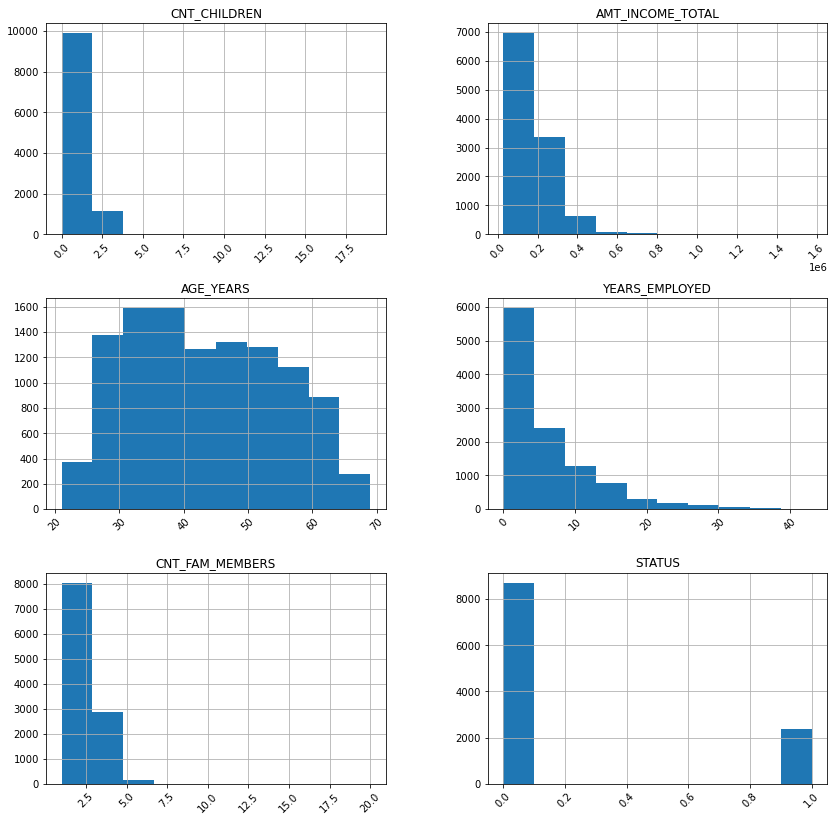

In [56]:
dimeji.hist(figsize = (14,14), xrot = 45)
plt.show

From the plots above, its clear that 
* CNT_FAM_MEMBERS, AMF_INCOME_TOTAL, YEARS_EMPLOYED and CNT_CHILDREN were highly skewed to the right.
* The potential outliers on CNT_FAM_MEMBERS, AMF_INCOME_TOTAL, YEARS_EMPLOYED and CNT_CHILDREN.

#### Descriptive Statistics of numerical features

In [57]:
dimeji.describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,11096.0,0.436013,0.779443,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,11096.0,183944.312455,101301.226066,27000.0,117000.0,157500.0,225000.0,1575000.0
AGE_YEARS,11096.0,43.339402,11.457922,21.0,34.0,42.0,53.0,69.0
YEARS_EMPLOYED,11096.0,5.875811,6.394968,-0.0,1.0,4.0,8.0,43.0
CNT_FAM_MEMBERS,11096.0,2.195566,0.945930,1.0,2.0,2.0,3.0,20.0
STATUS,11096.0,0.214942,0.410801,0.0,0.0,0.0,0.0,1.0


#### Descriptive Statistics of categorical features

In [58]:
catDimeji = dimeji.describe(include = 'object')
catDimeji.T

,count,unique,top,freq
CODE_GENDER,11096,2,F,7160
FLAG_OWN_CAR,11096,2,N,6920
FLAG_OWN_REALTY,11096,2,Y,7343
NAME_INCOME_TYPE,11096,5,Working,5808
NAME_EDUCATION_TYPE,11096,5,Secondary / secondary special,7627
NAME_FAMILY_STATUS,11096,5,Married,7442
NAME_HOUSING_TYPE,11096,6,House / apartment,9874


### Data Visualization

#### Plot of each categorical feature

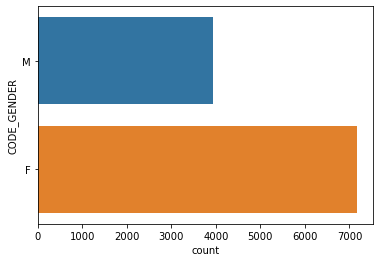

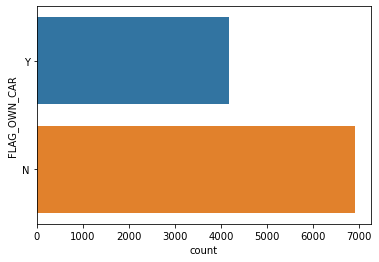

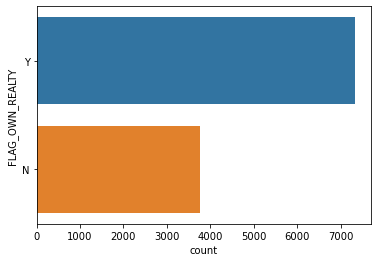

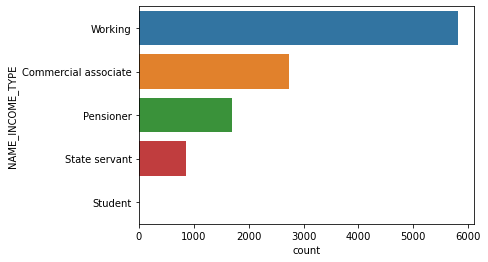

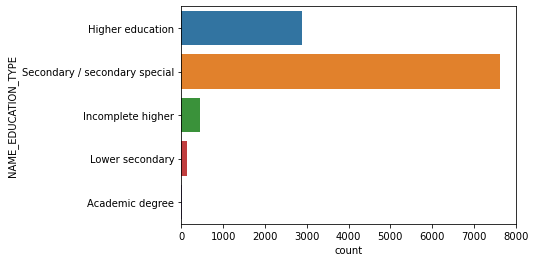

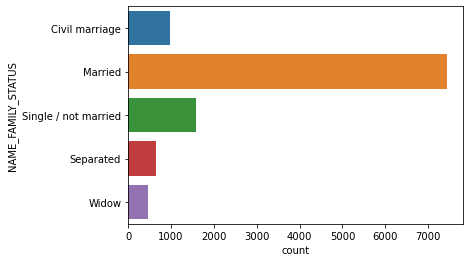

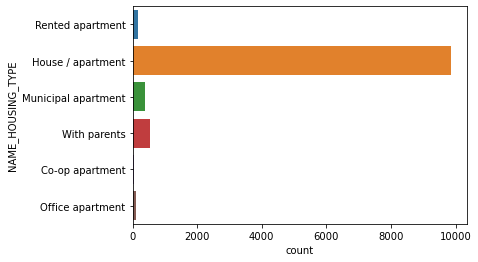

In [59]:
for column in dimeji.select_dtypes(include = 'object'):
    sns.countplot(y = column, data = dimeji)
    plt.show()

From the distribution of the categorical features:
* **Status**
    * Theere are some sparse classes in the status variable which might need to be merged or reassigned during modelling.
    * Majority of the values have either X or 0 entries.
* **CODE_GENDER**
    * The data contains the number of females twice as the number of males.
* **FLAG_OWN_CAR**
    * The number of applicants that own a car is about two third of the number that do not have a car.
* **FLAG_OWN_REALTY**
    * The number of applicants that own real - estate is twice the number that do not own any.
* **NAME_INCOME_TYPE**
    * Majority of the applicants are working.
    * The number of student applicants is negligibly low.
    * About twice as the number of applicants in commercial associate is the population of those working.
    * The number of pensioners is about one third of that of the working applicants, and twice that of the state servants.
* **NAME_EDUCATION_TYPE**
    * Majority of the applicants have secondary / secondary special qualifications.
    * More than 80% for the applicants possess either higher education or secondary/secondary special or both.
* **NAME_FAMILY_STATUS**
    * TMajority of the applicants are married.
    * Number of singles or not married is about twice that of those in civil marriage, and thrice the number of widows.
* **NAME_HOUSING_TYPE**
    * About 90% of the applicants live in House / apartment

#### Grouping and Segmentation

Segmentation allows us to slice the available data and observe the relationships between categorical and numeric features.

#### Target variable and categorical features

#### 1. Analysis of AGE_YEARS by the caterical features.

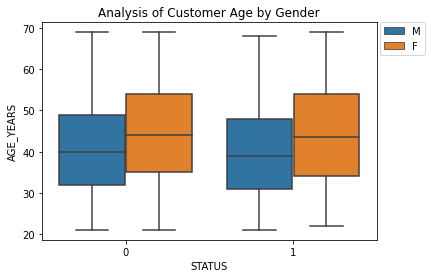

In [60]:
sns.boxplot(y = 'AGE_YEARS', x = 'STATUS', hue = 'CODE_GENDER', data = dimeji).set(title = 'Analysis of Customer Age by Gender')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

* **Note**
    * The median age of the men approved is 40 years with lower and upper quartiles of about 32 and 49 yaes respectively.
    * The age distribution of the approved men is almost the same the men rejected.
    * The age distribution of the approved wommen is almost the same the women rejected.
    * The median age of the women in the sample is about 44 years, higher than that of the men with about 40 years.
    * There is age balance between the women approved and those rejected. The same position holds for the men.

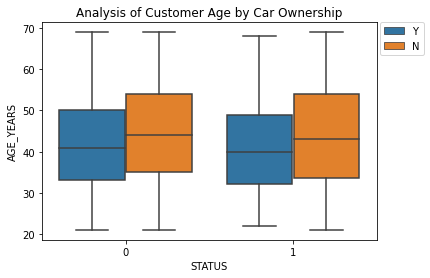

In [61]:
sns.boxplot(y = 'AGE_YEARS', x = 'STATUS', hue = 'FLAG_OWN_CAR', data = dimeji).set(title = 'Analysis of Customer Age by Car Ownership')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

* **Note**
    * The median age of the customers that own a car is about 42 years with lower and upper quartiles of about 32 and 50 yaers respectively.
    * The median age of the customers that do not own a car is about 53 years with lower and upper quartiles of about 33 and 54 yaers respectively.
    * The age distribution of the customer that own a car and with card approved is almost the same that of those rejected.
    * The age distribution of the customer the do not own a car and have their applications rejected is almost the same as those that approved.
    * The median customer for those own a car is about 42 years, lower than that of those that do nt own a car having a value of about 45 years.

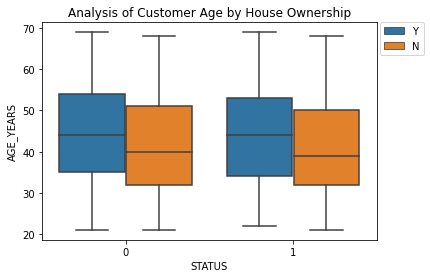

In [62]:
sns.boxplot(y = 'AGE_YEARS', x = 'STATUS', hue = 'FLAG_OWN_REALTY', data = dimeji).set(title = 'Analysis of Customer Age by House Ownership')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

* **Note**
    * The median age of the customers that own a house is about 44 years with lower and upper quartiles of about 33 and 54 yaers respectively.
    * The median age of the customers that do not own a house is about 40 years with lower and upper quartiles of about 31 and 50 yaers respectively.
    * The age distribution of the customer that own a house and with card approved is almost the same that of those rejected.
    * The age distribution of the customer the do not own a house and have their applications rejected is almost the same as those that approved.
    * The median customer for those own a house is about 42 years, lower than that of those that do nt own a car having a value of about 45 years.

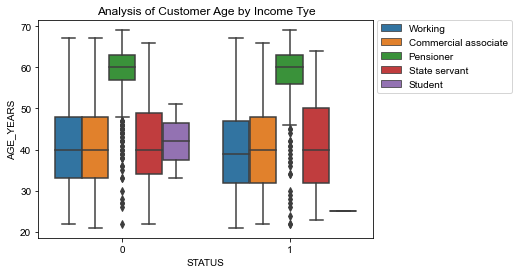

In [63]:
sns.boxplot(y = 'AGE_YEARS', x = 'STATUS', hue = 'NAME_INCOME_TYPE', data = dimeji).set(title = 'Analysis of Customer Age by Income Tye')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
sns.set(rc={'figure.figsize':(11,9)})
plt.show()

* **Note**
    * The median age of the working class customers and commercial associates are the same for those with applications, and also the respective lower and upper quartiles with values of about 33 and 48 years. There is a slight variation for the customers whose applications were rejected. In the later group, the median for the working class customers is lower than that of commercial associates.
    * There are outliers amongst the pensioners for both that have their applications approved and otherwise. There seems to be young customers between the age of 22 and 46 years who are pensioers.
    * The median pension age is about 60 years for those with approved applications and the otherwise.
    * The maximum pension age is about 68 years.
    * The distribution of state servants is skeewed to the right. The median is abot 40, closer to the lower quartile tham to the upper, for the approved applications.
    * No application from is student was rejected. However, student median age is about 43 years with lower and upper quartiles of 37 and 46 years respectively.

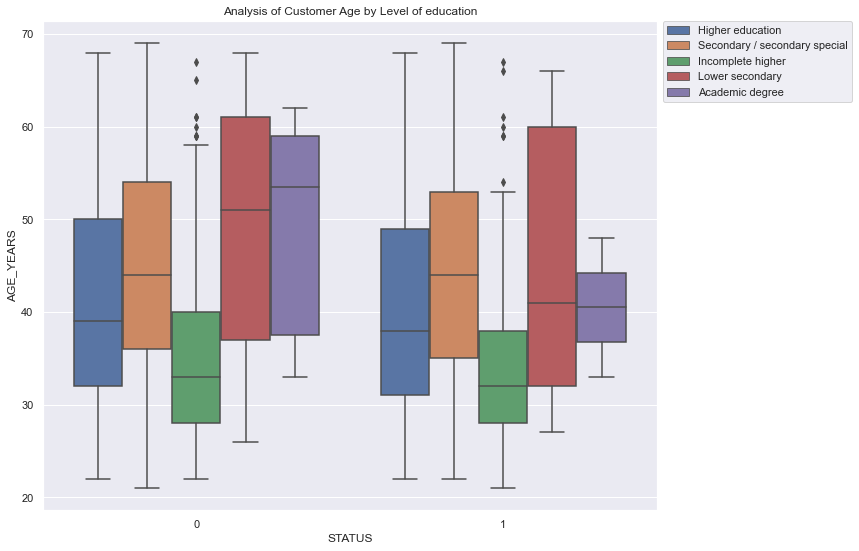

In [64]:
sns.boxplot(y = 'AGE_YEARS', x = 'STATUS', hue = 'NAME_EDUCATION_TYPE', data = dimeji).set(title = 'Analysis of Customer Age by Level of education')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
sns.set(rc={'figure.figsize':(11,11)})
plt.show()

* **Note**
    * The distributions of the customers with approved applications is positively skewed for those with higher education, and  secondary/special education.
    * The median age for customers approved and those of rejected applications are the same for those with higher education, and secondary/secondary special education. This same position holds for their lower and upper quartiles.
    * The distribution of the customers with incomplete higher education is positively skewed for both approved and rejected applications with respective median ages of about 35 years and 33 years respectively. Also, there are noticeable outliers amongst these groups.
    * While the distribution of those customers with approved applications is negatively skewed with a median of about 52 yeasr, the of those reject is positively skewed with median age of about 42 years.
    * Fewer applications were rejected for those with academic degrees. However, the distribution for the the approved applications is negatively skewed.

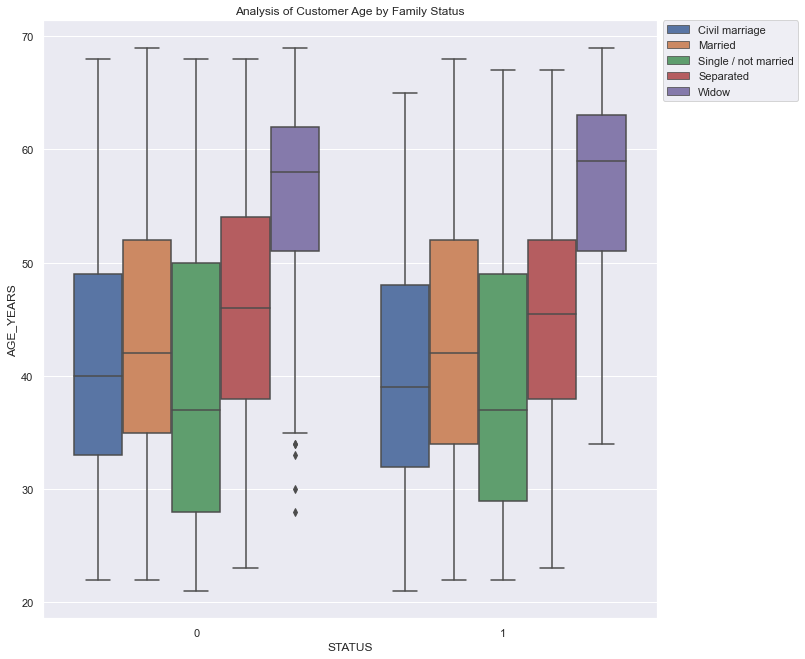

In [65]:
sns.boxplot(y = 'AGE_YEARS', x = 'STATUS', hue = 'NAME_FAMILY_STATUS', data = dimeji).set(title = 'Analysis of Customer Age by Family Status')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
sns.set(rc={'figure.figsize':(11,11)})
plt.show()

* **Note**
    * Widow customers have the highest mediate for both approved and rejected applications. The media age for the approved applications is 57 years while it is 59 years for the rejected applications. The distribution of the widows' age are negatively skewed. There were cases of outlier customers withh ages below the 35 years, although their applications were rejected.
    * The distributions of the singles/not married s positively skewed for both approved and rejected applications. The median age of the singles/not married is about 37 years.
    * The median age of the customers in civl marriage is 40 years with lower and upper quartiles of values 34 years and 48 yeas respectively. 

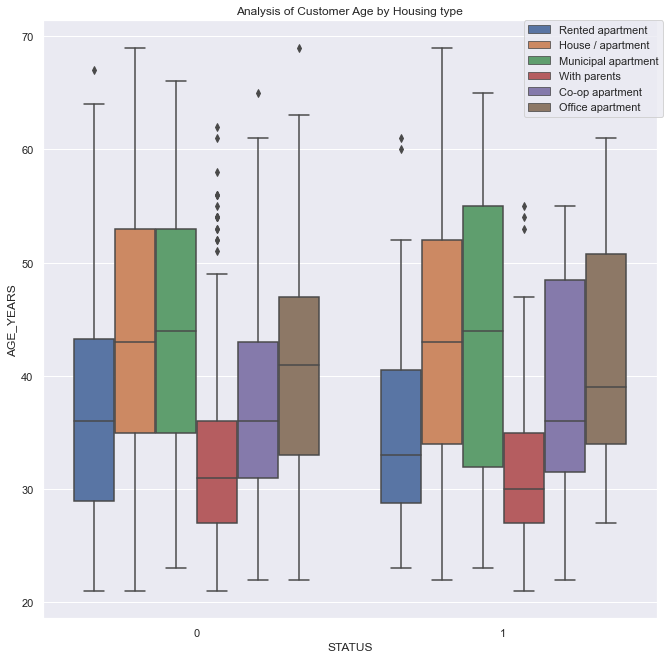

In [66]:
sns.boxplot(y = 'AGE_YEARS', x = 'STATUS', hue = 'NAME_HOUSING_TYPE', data = dimeji).set(title = 'Analysis of Customer Age by Housing type')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
sns.set(rc={'figure.figsize':(11,11)})
plt.show()

* **Note**
    * The largest group of customer with rejected applications are those living in municipal houses and median age of 44 years and lower and upper quartiles of 33 and 54 years respectively. Also, more of the applications of this group than those with approved applications.
    * More of the application of those in co-ope apartments were rejected than approved. The distibution of the customer ages in this group is positively skewed with median of about 35 years and lower and upper quartiles of 32 and 48 years respectively. Similar situation holds for the approved applications except that upper quartile is 43 years.
    * The distribution of those customers with their prents is positvely skewed despite the fact that the fewer than any other group. Ouliers were also noticed fo these groups.

#### Analysis of Years of employment

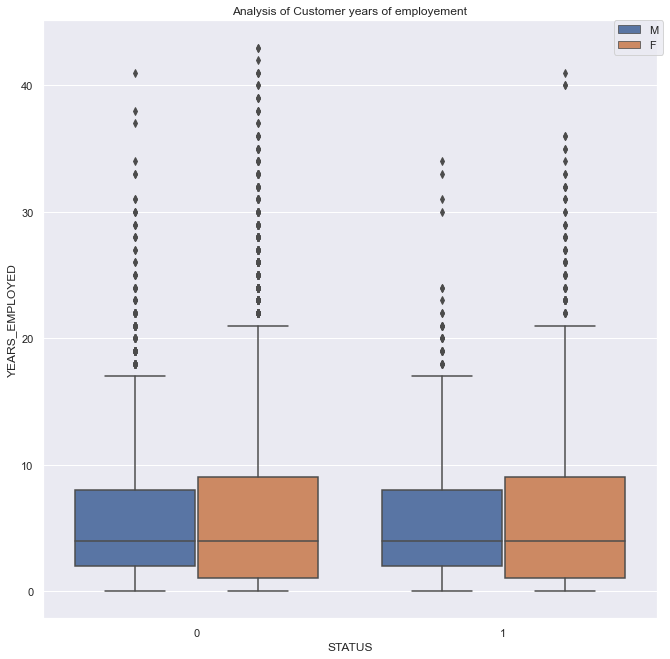

In [67]:
sns.boxplot(y = 'YEARS_EMPLOYED', x = 'STATUS', hue = 'CODE_GENDER', data = dimeji).set(title = 'Analysis of Customer years of employement')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
sns.set(rc={'figure.figsize':(11,11)})
plt.show()

* **Note**
    * The median number of years of employment remains the same across board with a value 4 yeasr. There are also outliers across the groups.
    * The distribution of teh number of years of employment for the females is positively skewed.

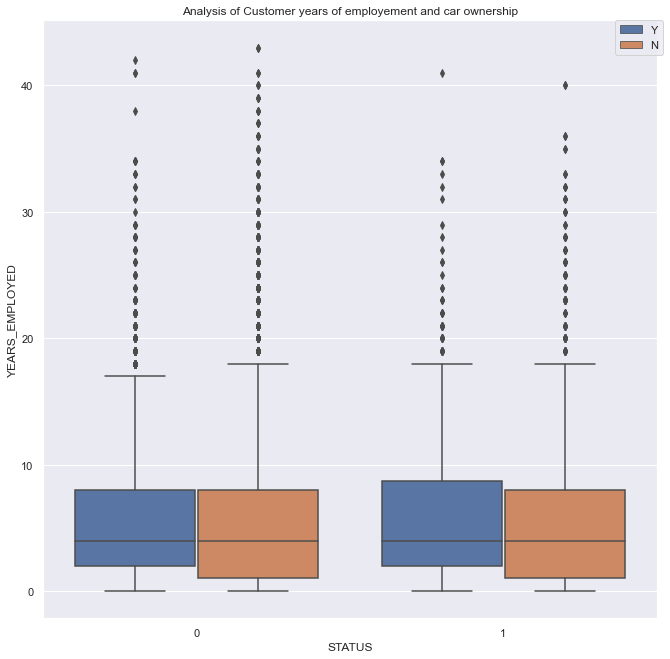

In [68]:
sns.boxplot(y = 'YEARS_EMPLOYED', x = 'STATUS', hue = 'FLAG_OWN_CAR', data = dimeji).set(title = 'Analysis of Customer years of employement and car ownership')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
sns.set(rc={'figure.figsize':(11,11)})
plt.show()

* **Note**
    * The median number of years of employment remains the same across board with a value 4 yeasr for both customers with cars and otherwise. There are also outliers across the groups.
    * The distribution of teh number of years of employment for the females is positively skewed.

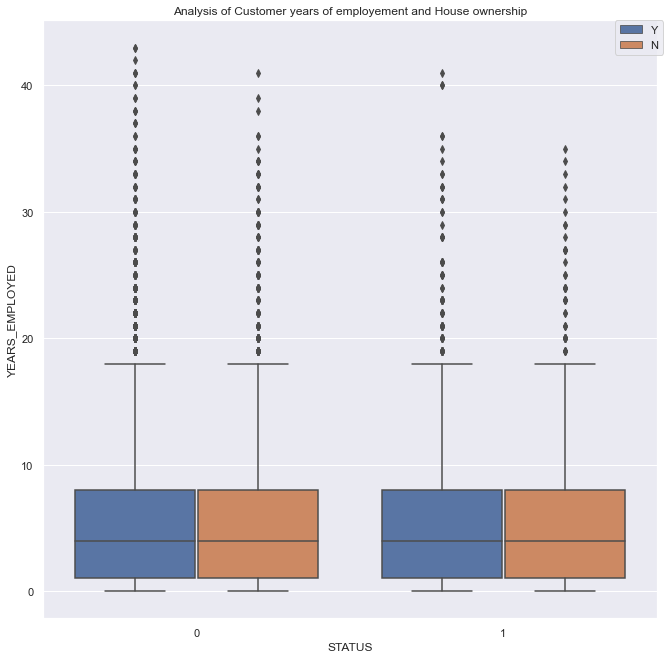

In [69]:
sns.boxplot(y = 'YEARS_EMPLOYED', x = 'STATUS', hue = 'FLAG_OWN_REALTY', data = dimeji).set(title = 'Analysis of Customer years of employement and House ownership')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
sns.set(rc={'figure.figsize':(11,11)})
plt.show()

The distribution of the noumber of years employed remains the same across boad with median4 years. They are all have outliers from those that have worked for more than 18 years.

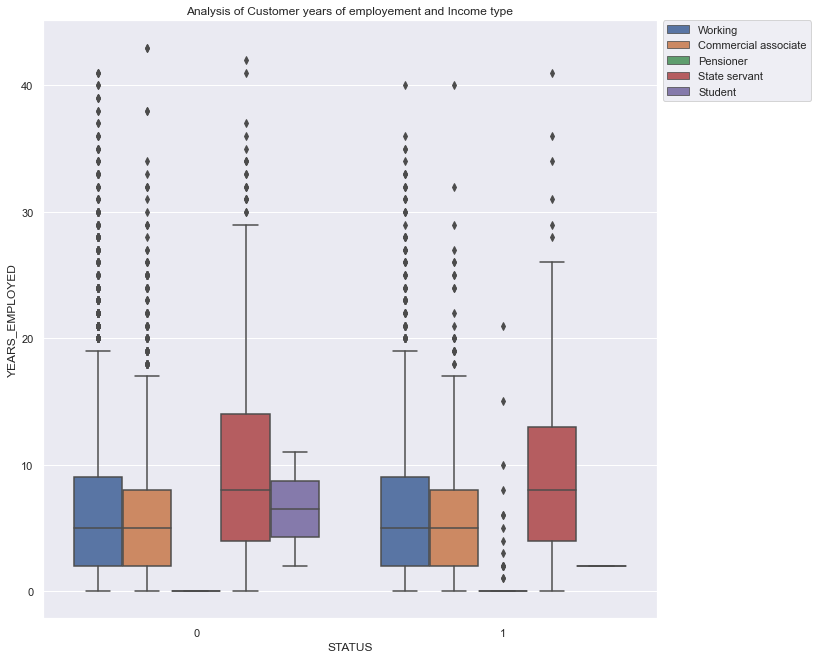

In [70]:
sns.boxplot(y = 'YEARS_EMPLOYED', x = 'STATUS', hue = 'NAME_INCOME_TYPE', data = dimeji).set(title = 'Analysis of Customer years of employement and Income type')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
sns.set(rc={'figure.figsize':(11,11)})
plt.show()

* **Note**
    * Almost all the student applications are approved.
    * Some pensioners applications were rejected.

### Establishing the relationships amongs the numeric variables

In [71]:
# Getting the correlation table
dimeji_corr = dimeji.corr()
dimeji_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
CNT_CHILDREN,1.000000,0.028182,-0.308425,0.027988,0.893466,0.005660
AMT_INCOME_TOTAL,0.028182,1.000000,-0.049158,0.075775,0.024369,0.024117
AGE_YEARS,-0.308425,-0.049158,1.000000,0.021876,-0.267035,-0.023447
YEARS_EMPLOYED,0.027988,0.075775,0.021876,1.000000,0.049221,-0.000508
CNT_FAM_MEMBERS,0.893466,0.024369,-0.267035,0.049221,1.000000,0.005236
STATUS,0.005660,0.024117,-0.023447,-0.000508,0.005236,1.000000


The associated Heatmap of the above correlation table is as shown below

<AxesSubplot:>

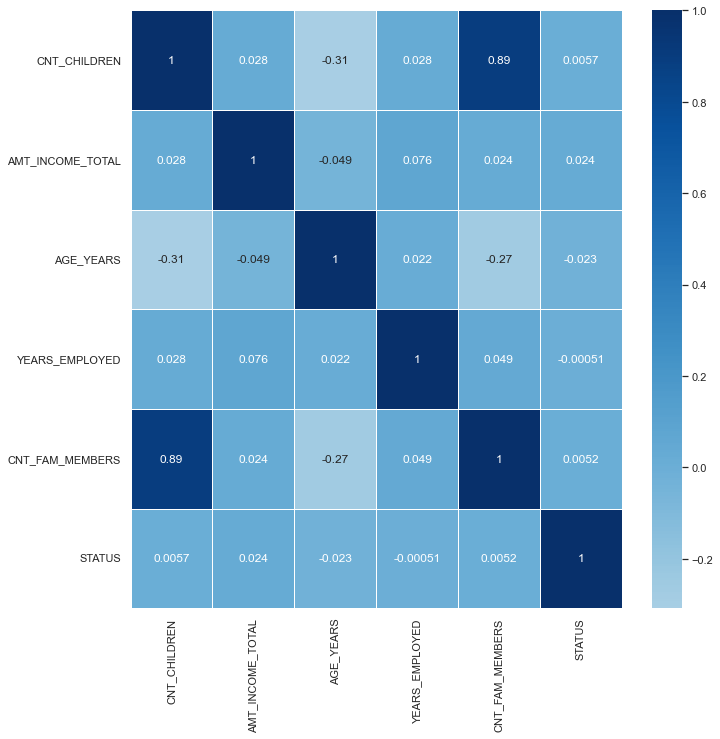

In [72]:
sns.heatmap(dimeji_corr, cmap = 'Blues', annot = True, center = 0, linewidth = 1)

* **Note**
    * STATUS, AMT_INCOME_TOTAL, Years_employed and CNT_FAM_MEMBERS are each positively correlated with CNT_Children.
    * STATUS, years_employed and CNT_FAM_MEMBERS are positively correlated with AMT_INCOME_TOTAL.
    * years_employed is positively correlated with AGE_YEARS.
    * STATUS, years_employed and CNT_FAM_MEMBERS are positively correlated with AMT_INCOME_TOTAL.
    * CNT_FAM_MEMBERS IS positively correlated with YEARS_EMPLOYED.
    * AGE_YEARS is negatively correlated with CNT_CHILDREN and AMT_INCOME_TOTAL.
    * STATUS and CNT_FAM_MEMBERS are negatively correlated with AGE_YEARS.
    * STATUS is negatively correlated with YEARS_EMPLOYED.

In [73]:
#CORRELATING the variables with the target variable
corrs_results = dimeji.corrwith(dimeji["STATUS"]).abs().nlargest(24)
corrs_results

STATUS              1.000000
AMT_INCOME_TOTAL    0.024117
AGE_YEARS           0.023447
CNT_CHILDREN        0.005660
CNT_FAM_MEMBERS     0.005236
YEARS_EMPLOYED      0.000508
dtype: float64

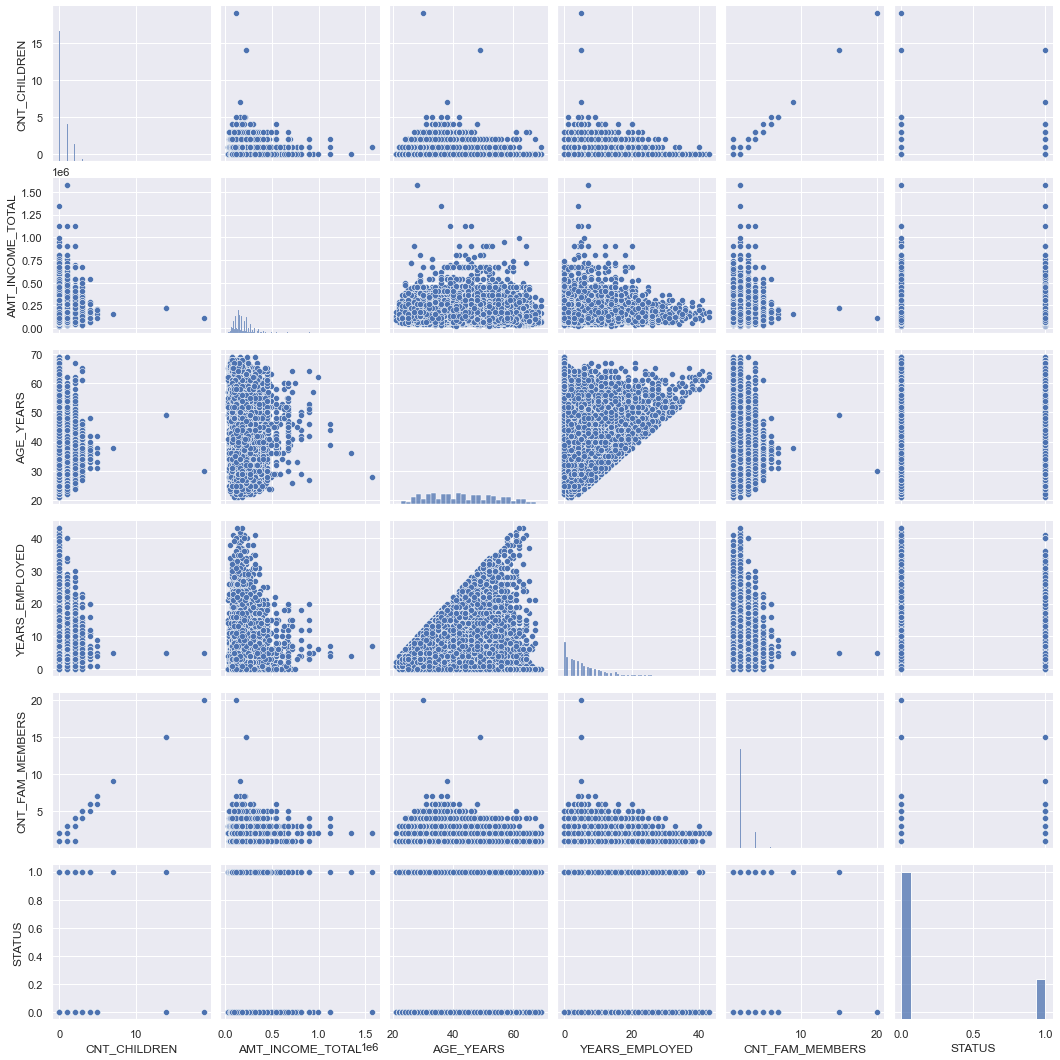

In [74]:
sns.pairplot(dimeji)

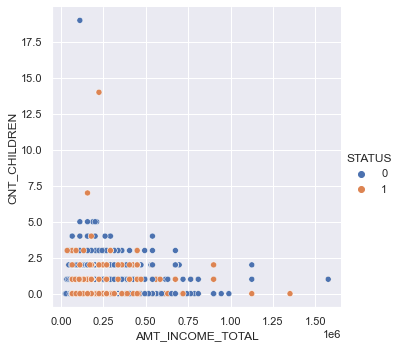

In [75]:
sns.relplot(x = 'AMT_INCOME_TOTAL', y = 'CNT_CHILDREN', hue = 'STATUS', data = dimeji)

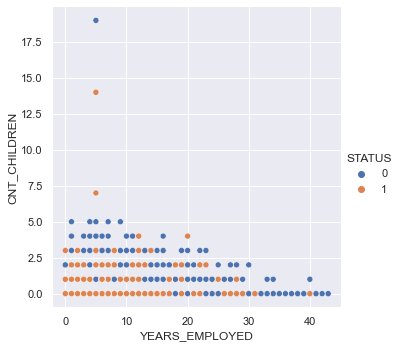

In [76]:
sns.relplot(x = 'YEARS_EMPLOYED', y = 'CNT_CHILDREN', hue = 'STATUS', data = dimeji)

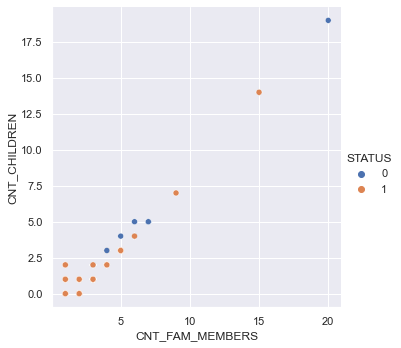

In [77]:
sns.relplot(x = 'CNT_FAM_MEMBERS', y = 'CNT_CHILDREN', hue = 'STATUS', data = dimeji)

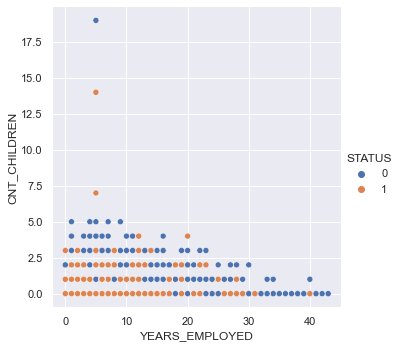

In [78]:
sns.relplot(x = 'YEARS_EMPLOYED', y = 'CNT_CHILDREN', hue = 'STATUS', data = dimeji)

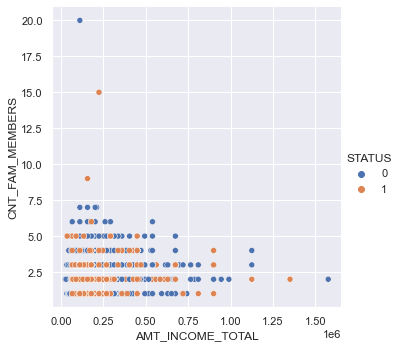

In [79]:
sns.relplot(x = 'AMT_INCOME_TOTAL', y = 'CNT_FAM_MEMBERS', hue = 'STATUS', data = dimeji)

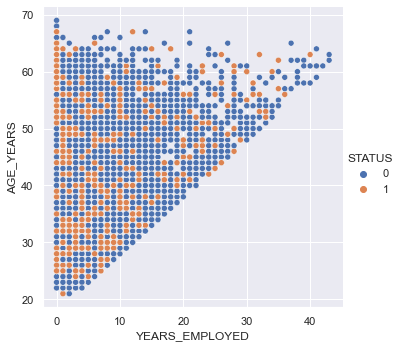

In [80]:
sns.relplot(x = 'YEARS_EMPLOYED', y = 'AGE_YEARS', hue = 'STATUS', data = dimeji)

### Feature Engineering: Pre-Processing the data

In [81]:
#Taking a copy of the dataset
dimeji2 = dimeji.copy()

In [82]:
dimeji2

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,-0.0,1.0,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,52.0,5.0,2.0,1
11092,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,44.0,26.0,2.0,1
11093,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,48.0,7.0,2.0,1
11094,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,34.0,4.0,2.0,1


 #### Convert non-numric data to numeric

In [83]:
from sklearn.preprocessing import LabelEncoder

for col in catDimeji:
    globals()['LE_{}'.format(col)] = LabelEncoder()
    dimeji[col] = globals()['LE_{}'.format(col)].fit_transform(dimeji[col])
    dimeji.head()

In [84]:
dimeji

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0,1
1,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0,0
2,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
3,0,0,1,0,283500.0,1,1,2,1,62.0,-0.0,1.0,0
4,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,1,1,1,0,90000.0,4,4,1,1,52.0,5.0,2.0,1
11092,0,1,1,0,130500.0,4,4,1,1,44.0,26.0,2.0,1
11093,1,1,1,0,315000.0,4,4,1,1,48.0,7.0,2.0,1
11094,0,0,1,0,157500.0,1,1,1,1,34.0,4.0,2.0,1


In [85]:
X = dimeji.drop(['STATUS'], axis = 1) #the feature variables
y = label = dimeji['STATUS'] #target variable

#### Spliting the data into training and Test sets

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

#### Scaler

In [87]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.transform(x_test)

### Model Development

In [88]:
#List of Machine Leaning Algorithms(MLA)
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    linear_model.LogisticRegression(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(),
    svm.SVC(probability = True),
    tree.DecisionTreeClassifier()
    
    
]

In [108]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0

for alg in MLA:
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    cm = metrics.confusion_matrix(y_test, predicted)
    #bias = mse - var
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Training Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted),
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted),
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp),
    MLA_compare.loc[row_index, 'F1 Score macro'] = metrics.f1_score(y_test, predicted, average = 'macro'),
    MLA_compare.loc[row_index, 'F1 Score micro'] = metrics.f1_score(y_test, predicted, average = 'micro'),
    #MLA_compare.loc[row_index, 'Jaccard Sim. Score'] = metrics.jaccard_similarity_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Log loss'] = metrics.log_loss(y_test, predicted),
    MLA_compare.loc[row_index, 'MSE'] = mean_squared_error(y_test, predicted),
    MLA_compare.loc[row_index, 'Variance'] = np.var(predicted),
    MLA_compare.loc[row_index, 'BIAS'] = mean_squared_error(y_test, predicted) - np.var(predicted),
    MLA_compare.loc[row_index, 'True Positive'] = cm[0][0],
    MLA_compare.loc[row_index, 'True Negatives'] = cm[1][1],
    MLA_compare.loc[row_index, 'False Positive'] = cm[0][1],
    MLA_compare.loc[row_index, 'False Negative'] = cm[1][0]
    
    row_index +=1
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)

MLA_compare

,Model Name,Training Accuracy,Test Accuracy,Precision,Recall,AUC,F1 Score macro,F1 Score micro,Log loss,MSE,Variance,BIAS,True Positive,True Negatives,False Positive,False Negative
0,AdaBoostClassifier,0.7875,0.7761,0.000000,0.000000,0.500000,0.436977,0.776126,7.732330,0.223874,0.000000,0.223874,1723.0,0.0,0.0,497.0
3,LogisticRegression,0.7873,0.7761,0.000000,0.000000,0.500000,0.436977,0.776126,7.732330,0.223874,0.000000,0.223874,1723.0,0.0,0.0,497.0
6,SVC,0.7874,0.7761,0.000000,0.000000,0.500000,0.436977,0.776126,7.732330,0.223874,0.000000,0.223874,1723.0,0.0,0.0,497.0
1,GradientBoostingClassifier,0.7881,0.7748,0.000000,0.000000,0.499129,0.436548,0.774775,7.779005,0.225225,0.001350,0.223876,1720.0,0.0,3.0,497.0
4,GaussianNB,0.7826,0.7685,0.185185,0.010060,0.498646,0.443914,0.768468,7.996824,0.231532,0.012014,0.219517,1701.0,5.0,22.0,492.0
5,KNeighborsClassifier,0.7975,0.7329,0.125000,0.032193,0.483595,0.447880,0.732883,9.225939,0.267117,0.054333,0.212784,1611.0,16.0,112.0,481.0
2,RandomForestClassifier,0.8772,0.6640,0.026616,0.014085,0.432753,0.407852,0.663964,11.606366,0.336036,0.104434,0.231602,1467.0,7.0,256.0,490.0
7,DecisionTreeClassifier,0.8772,0.5982,0.065934,0.060362,0.406850,0.403646,0.598198,13.877896,0.401802,0.162948,0.238853,1298.0,30.0,425.0,467.0


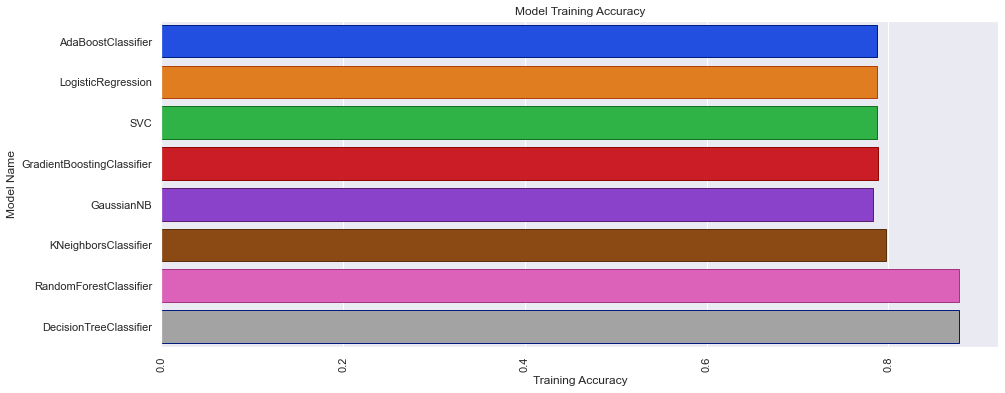

In [90]:
plt.subplots(figsize = (15, 6))
sns.barplot(x = "Training Accuracy", y = "Model Name", data = MLA_compare, palette = 'bright', edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Model Training Accuracy')
plt.show()

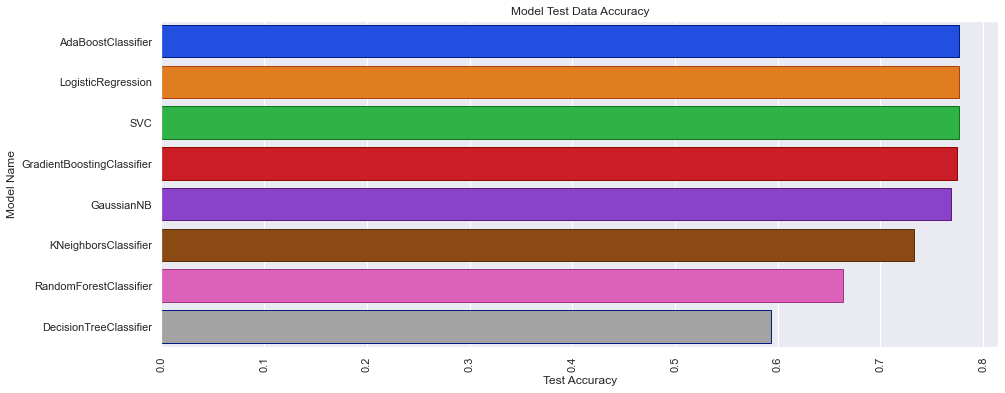

In [91]:
plt.subplots(figsize = (15, 6))
sns.barplot(x = "Test Accuracy", y = "Model Name", data = MLA_compare, palette = 'bright', edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Model Test Data Accuracy')
plt.show()

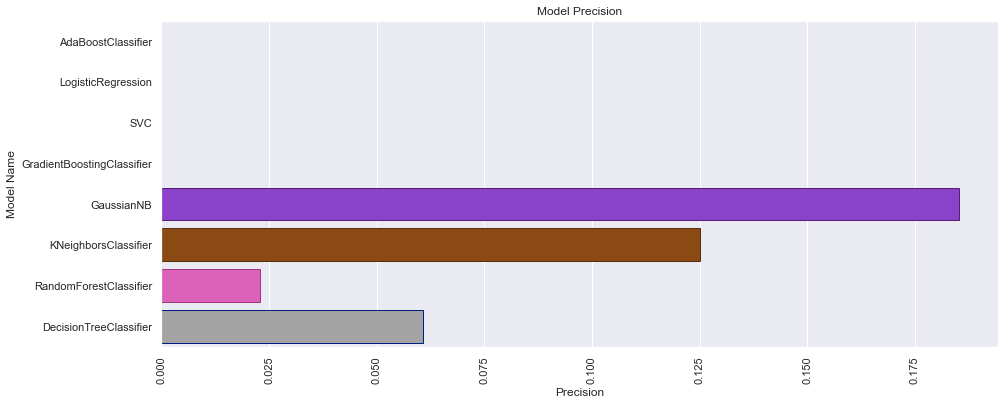

In [92]:
plt.subplots(figsize = (15, 6))
sns.barplot(x = "Precision", y = "Model Name", data = MLA_compare, palette = 'bright', edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Model Precision')
plt.show()

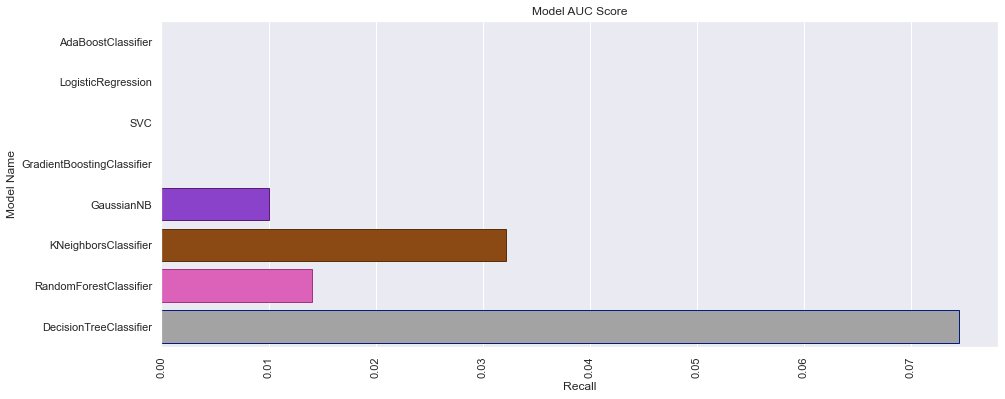

In [176]:
plt.subplots(figsize = (15, 6))
sns.barplot(x = "Recall", y = "Model Name", data = MLA_compare, palette = 'bright', edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Model AUC Score')
plt.show()

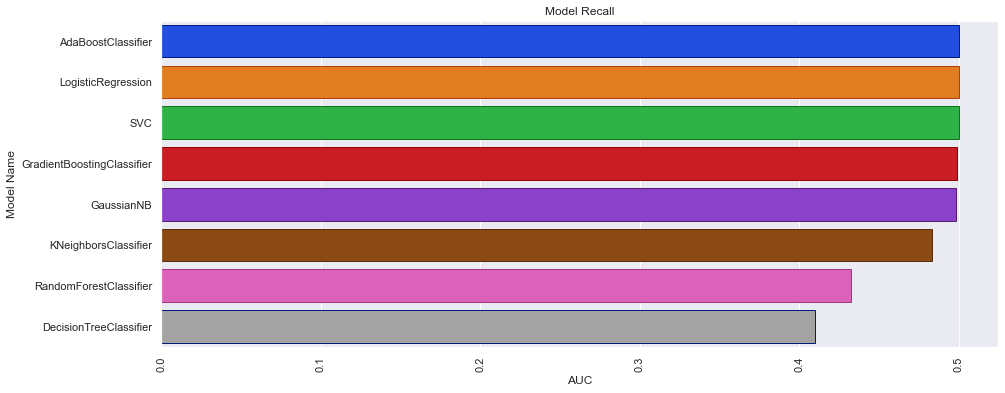

In [177]:
plt.subplots(figsize = (15, 6))
sns.barplot(x = "AUC", y = "Model Name", data = MLA_compare, palette = 'bright', edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Model Recall')
plt.show()

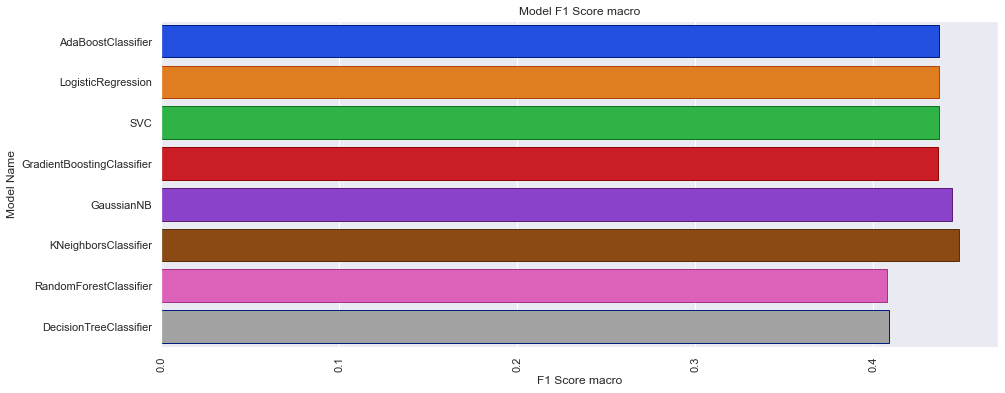

In [178]:
plt.subplots(figsize = (15, 6))
sns.barplot(x = "F1 Score macro", y = "Model Name", data = MLA_compare, palette = 'bright', edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Model F1 Score macro')
plt.show()

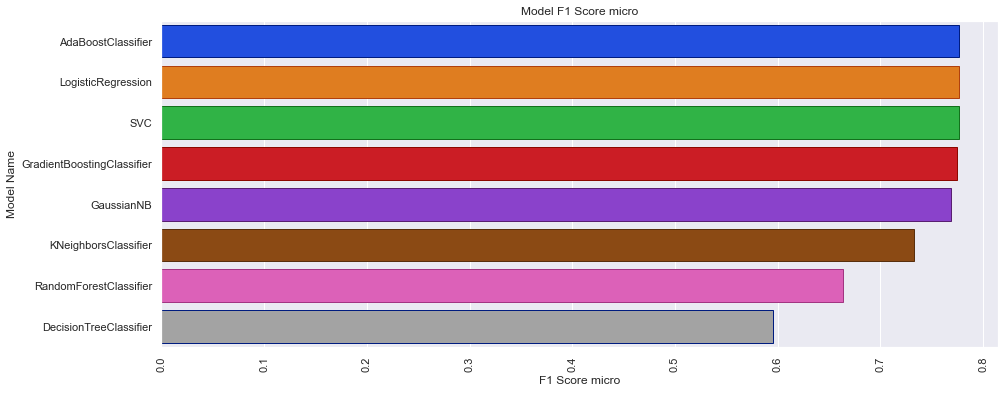

In [179]:
plt.subplots(figsize = (15, 6))
sns.barplot(x = "F1 Score micro", y = "Model Name", data = MLA_compare, palette = 'bright', edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Model F1 Score micro')
plt.show()

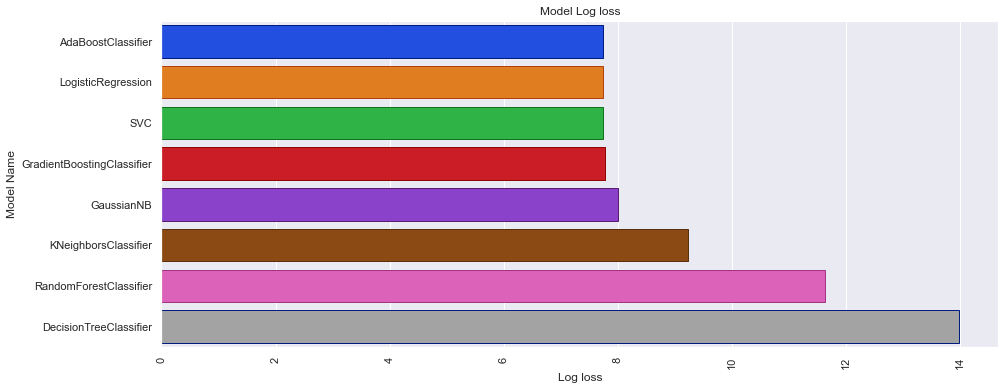

In [180]:
plt.subplots(figsize = (15, 6))
sns.barplot(x = "Log loss", y = "Model Name", data = MLA_compare, palette = 'bright', edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Model Log loss')
plt.show()

### Bias - Variance Analysis

In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0

for alg in MLA:
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    cm = metrics.confusion_matrix(y_test, predicted)
    #bias = mse - var
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Training Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted),
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted),
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp),
    MLA_compare.loc[row_index, 'F1 Score macro'] = metrics.f1_score(y_test, predicted, average = 'macro'),
    MLA_compare.loc[row_index, 'F1 Score micro'] = metrics.f1_score(y_test, predicted, average = 'micro'),
    #MLA_compare.loc[row_index, 'Jaccard Sim. Score'] = metrics.jaccard_similarity_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Log loss'] = metrics.log_loss(y_test, predicted),
    MLA_compare.loc[row_index, 'MSE'] = mean_squared_error(y_test, predicted),
    MLA_compare.loc[row_index, 'Variance'] = np.var(predicted),
    MLA_compare.loc[row_index, 'BIAS'] = mean_squared_error(y_test, predicted) - np.var(predicted),
    MLA_compare.loc[row_index, 'True Positive'] = cm[0][0],
    MLA_compare.loc[row_index, 'True Negatives'] = cm[1][1],
    MLA_compare.loc[row_index, 'False Positive'] = cm[0][1],
    MLA_compare.loc[row_index, 'False Negative'] = cm[1][0]
    
    row_index +=1
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)

MLA_compare